### Naive Bayes (Classifier) - Gaussian Naive Bayes

#### Predicting Personal Loan Acceptance Based on Naive Bayes Classifier

- The file **UniversalBank.csv** contains data on 5000 customers of Universal Bank. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (=9.6%) accepted the personal loan that was offered to them in the earlier campaign. 

A brief description of the 14 variables are given below:

1. ID: Customer ID 
2. Age: Customer's age in completed year 
3. Experience: # years of professional experience 
4. Income: Annual income of the customer (1,000) 
5. ZIPcode: Home address ZIP code 
6. Family: Family size of the customer 
7. CCAvg: Average monthly credit card spending (1, 000) 
8. Education: Education level: 1: undergrad; 2, Graduate; 3; Advance/Professional 
9. Mortgage: Value of house mortgage if any (1, 000) 
10. Personal loan: Did this customer accept the personal loan offered in he last campaign? 1, yes; 0, no 
11. Securities Acct: Does the customer have a securities account with the bank? 
12. CD Account: Does the customer have a certifcate of deposit (CD) account with the bank? 
13. Online: Does the customer use internet bank facilities? 
14. CreditCard: Does the customer use a credit card issued by the Bank?

In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

# load dataset 'UniversalBank.csv', using 'ID' as index column

data = pd.read_csv('UniversalBank.csv', index_col='ID')

In [2]:
data.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
# define independent attributes 
features = ['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account', 'CD Account', 'Online', 'CreditCard']

# assign values for independent variables and target variable ('Personal Loan')
X = data [features]
y = data ['Personal Loan']

In [5]:
# import cross validation
from sklearn.model_selection import cross_val_predict, cross_val_score

In [6]:
#Import Gaussian Naive Bayes model from sklearn
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Naive Bayes Classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
gnb = GaussianNB()

In [7]:
pred_y = cross_val_predict(gnb,X,y,cv=10)

In [8]:
pred_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
score = cross_val_score(gnb,X,y,cv=10)

In [10]:
score.mean()

0.883

In [11]:
# import libararies for evaluation measures
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
# Do majority-class prediction (not accept: 0) -> Benchmark model
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.htm
pred_val_maj = np.zeros((5000,),dtype=int)

In [15]:
pred_val_maj

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
# print the accurary rate
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy of Benchmark Model:","\n", accuracy_score(y, pred_val_maj, normalize=True, sample_weight=None))
print("Accuracy of Naive Bayes Model:","\n", accuracy_score(y, pred_y, normalize=True, sample_weight=None))

Accuracy of Benchmark Model: 
 0.904
Accuracy of Naive Bayes Model: 
 0.883


In [17]:
# print the confusion matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix of Benchmark Model:", "\n", confusion_matrix(y, pred_val_maj))
print("Confusion Matrix of Naive Bayes Model:", "\n", confusion_matrix(y, pred_y))

Confusion Matrix of Benchmark Model: 
 [[4520    0]
 [ 480    0]]
Confusion Matrix of Naive Bayes Model: 
 [[4138  382]
 [ 203  277]]


In [18]:
# print the classification report with precision, recall
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("Classification Report of Benchmark Model:", "\n", classification_report(y, pred_val_maj))
print("Classification Report of Naive Bayes Model:","\n",classification_report(y, pred_y))

Classification Report of Benchmark Model: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      4520
           1       0.00      0.00      0.00       480

   micro avg       0.90      0.90      0.90      5000
   macro avg       0.45      0.50      0.47      5000
weighted avg       0.82      0.90      0.86      5000

Classification Report of Naive Bayes Model: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      4520
           1       0.42      0.58      0.49       480

   micro avg       0.88      0.88      0.88      5000
   macro avg       0.69      0.75      0.71      5000
weighted avg       0.90      0.88      0.89      5000



C:\Users\pooh1\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
# train model using all training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.fit
gnb.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# test model (output probability estimate)
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba
pred_prob = gnb.predict_proba(X)

# show the probability of belonging to class 0 and class 1
pred_prob

array([[9.99825023e-01, 1.74977007e-04],
       [9.99966792e-01, 3.32081549e-05],
       [9.99999193e-01, 8.06803789e-07],
       ...,
       [9.99990082e-01, 9.91781011e-06],
       [9.99919420e-01, 8.05797337e-05],
       [9.99315539e-01, 6.84461303e-04]])

In [21]:
pred_prob[:,1]

array([1.74977007e-04, 3.32081549e-05, 8.06803789e-07, ...,
       9.91781011e-06, 8.05797337e-05, 6.84461303e-04])

In [22]:
# y is the true label, pred_prob[:,1] measures the predicted probability of belonging to class 1 (which is defined as positive class)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(y, pred_prob[:,1], pos_label=1)
#fpr, tpr, thresholds = roc_curve(y_test, pred_val2, pos_label=1)

In [23]:
# Aread under ROC curve
roc_auc=auc(fpr,tpr)
roc_auc

0.9269823930678465

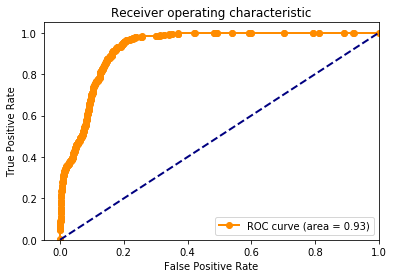

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
lw = 2
plt.plot(fpr, tpr, marker='o',color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [27]:
gnb.class_count_

array([4520.,  480.])

In [28]:
gnb.class_prior_

array([0.904, 0.096])

In [29]:
# theta: mean of each feature per class
gnb.theta_

array([[4.53672566e+01, 2.01323009e+01, 6.62373894e+01, 2.37345133e+00,
        1.72900885e+00, 1.84358407e+00, 5.17893805e+01, 1.02212389e-01,
        3.58407080e-02, 5.95796460e-01, 2.93584071e-01],
       [4.50666667e+01, 1.98437500e+01, 1.44745833e+02, 2.61250000e+00,
        3.90535417e+00, 2.23333333e+00, 1.00845833e+02, 1.25000000e-01,
        2.91666667e-01, 6.06250000e-01, 2.97916667e-01]])

In [30]:
gnb_theta = pd.DataFrame(gnb.theta_, columns= X.columns)  
gnb_theta

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


In [31]:
# variance of each feature per class
gnb_sigma = pd.DataFrame(gnb.sigma_, columns= X.columns)  
gnb_sigma

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,131.083274,131.226312,1646.25317,1.319394,2.456985,0.705412,8469.290606,0.091775,0.034566,0.240833,0.207403
1,134.070566,133.873513,995.49791,1.241521,4.391109,0.566399,25818.134576,0.109385,0.206608,0.238721,0.209173
